In [2]:
# import Data_preprocessing 

import import_ipynb
import Data_preprocessing
from Data_preprocessing import *

In [3]:
X=df_dementia.drop(["Group"],axis=1)
y=df_dementia["Group"]

<b> Logistic Regression </b>

In [4]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [6]:
y_pred1=logreg.predict(X_test)

In [7]:
from sklearn.metrics import classification_report
cm1=classification_report(y_test,y_pred1)
print(cm1)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [8]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_pred1,y_test)
TP=cm1[0,0]
TN=cm1[1,1]
FP=cm1[1,0]
FN=cm1[0,1]

acc1 = (TN+TP)/(TN+FP+TP+FN)
precision1 = TP / (TP+FP)
recall1 = TP / (TP+FN)
specificity1 = TN / (TN+FP)
f1_score1 = 2*((precision1*recall1)/(precision1+recall1))

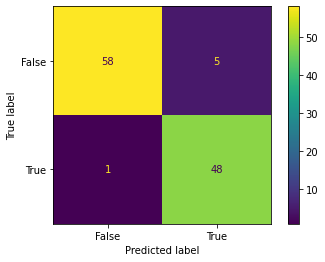

In [9]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])

cm_display.plot()
plt.show()

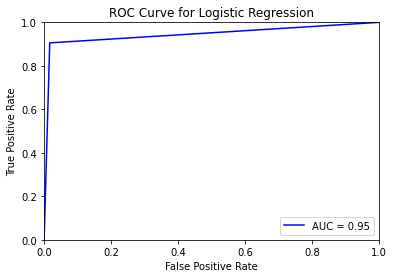

In [10]:
fpr1, tpr1, threshold = metrics.roc_curve(y_test, y_pred1)

plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % acc1)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
lr_results = pd.DataFrame(['1','Logistic Regression',acc1,'%.6f'% precision1,recall1,f1_score1]).transpose()
lr_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
lr_results.set_index('Index',inplace=True)
lr_results

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082


<b>Logistic Regression - Hyperparameter Tunning</b>

In [12]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = {'penalty': ['l1','l2','elasticnet','none'],
                   'C': [100, 10, 1.0, 0.1, 0.01],
                   'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                    'max_iter' : [100, 1000,2500, 5000]}

lr_classification = LogisticRegression()

lr_grid = GridSearchCV(estimator = lr_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5)

# fit the model on X_train and y_train using fit()
lr_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Logistic Regression: ', lr_grid.best_params_, '\n')

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was

Best parameters for Logistic Regression:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'} 



c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Windows 10\App

In [13]:
y_pred2=lr_grid.predict(X_test)

In [14]:
cm2=classification_report(y_test,y_pred2)
print(cm2)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [15]:
cm2 = confusion_matrix(y_pred2,y_test)
TP=cm2[0,0]
TN=cm2[1,1]
FP=cm2[1,0]
FN=cm2[0,1]

acc2 = (TN+TP)/(TN+FP+TP+FN)
precision2 = TP / (TP+FP)
recall2 = TP / (TP+FN)
specificity2 = TN / (TN+FP)
f1_score2 = 2*((precision2*recall2)/(precision2+recall2))

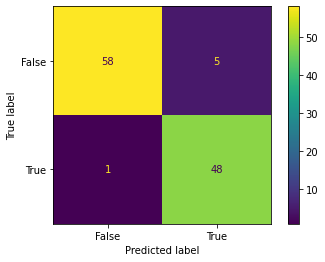

In [16]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])

cm_display.plot()
plt.show()

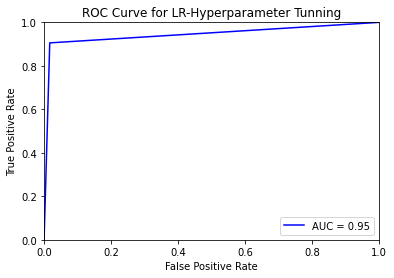

In [17]:
fpr2, tpr2, threshold = metrics.roc_curve(y_test, y_pred2)

plt.title('ROC Curve for LR-Hyperparameter Tunning')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % acc2)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
lr_ht_results = pd.DataFrame(['2','LR-Hyperparameter Tunning',acc2,'%.6f'% precision2,recall2,f1_score2]).transpose()
lr_ht_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
lr_ht_results.set_index('Index',inplace=True)
data =pd.concat([lr_results, lr_ht_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082


<b> Naive Bayes </b>

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred3=gnb_model.predict(X_test)

In [21]:
cm3=classification_report(y_test,y_pred3)
print(cm3)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.98      0.92      0.95        53

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112



In [22]:
cm3 = confusion_matrix(y_pred3,y_test)
TP=cm3[0,0]
TN=cm3[1,1]
FP=cm3[1,0]
FN=cm3[0,1]

acc3 = (TN+TP)/(TN+FP+TP+FN)
precision3 = TP / (TP+FP)
recall3 = TP / (TP+FN)
specificity3 = TN / (TN+FP)
f1_score3 = 2*((precision3*recall3)/(precision3+recall3))

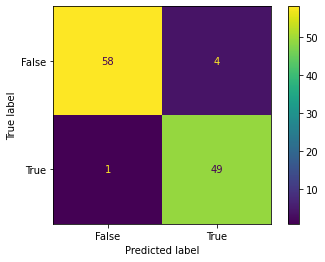

In [23]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = [False, True])

cm_display.plot()
plt.show()

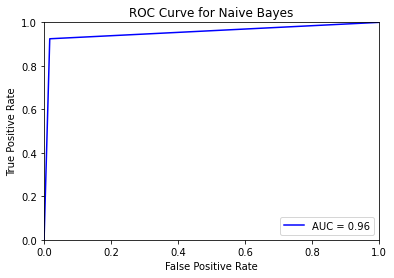

In [24]:
fpr3, tpr3, threshold = metrics.roc_curve(y_test, y_pred3)

plt.title('ROC Curve for Naive Bayes')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % acc3)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
gnb_results = pd.DataFrame(['3','Naive Bayes',acc3,'%.6f'% precision3,recall3,f1_score3]).transpose()
gnb_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
gnb_results.set_index('Index',inplace=True)
data =pd.concat([data, gnb_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678


<b>Naive Bayes-Hyperparameter Tuning</b>

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [27]:
tuned_paramaters = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb_ht = GaussianNB()
gnb_grid = GridSearchCV(estimator=gnb_ht, 
                     param_grid=tuned_paramaters, 
                     cv=5)

# fit the model on X_train and y_train using fit()
gnb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Gaussian Naive Bayes: ', gnb_grid.best_params_, '\n')


Best parameters for Gaussian Naive Bayes:  {'var_smoothing': 0.1873817422860384} 



In [28]:
y_pred4=gnb_grid.predict(X_test)

In [29]:
cm4=classification_report(y_test,y_pred4)
print(cm4)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [30]:
cm4 = confusion_matrix(y_pred4,y_test)
TP=cm4[0,0]
TN=cm4[1,1]
FP=cm4[1,0]
FN=cm4[0,1]

acc4 = (TN+TP)/(TN+FP+TP+FN)
precision4 = TP / (TP+FP)
recall4 = TP / (TP+FN)
specificity4 = TN / (TN+FP)
f1_score4 = 2*((precision4*recall4)/(precision4+recall4))

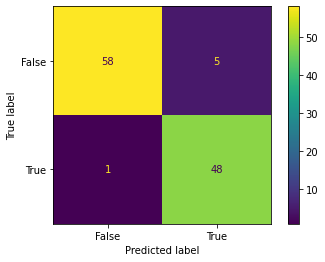

In [31]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm4, display_labels = [False, True])

cm_display.plot()
plt.show()

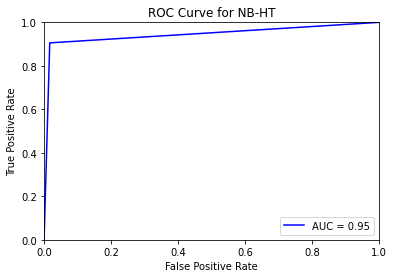

In [32]:
fpr4, tpr4, threshold = metrics.roc_curve(y_test, y_pred4)

plt.title('ROC Curve for NB-HT')
plt.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % acc4)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
nb_ht_results = pd.DataFrame(['4','NB-Hyperparameter Tuning',acc4,'%.6f'% precision4,recall4,f1_score4]).transpose()
nb_ht_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
nb_ht_results.set_index('Index',inplace=True)
data =pd.concat([data, nb_ht_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082


<b> K-Nearest Neighbor </b>

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

In [35]:
y_pred5=knn_model.predict(X_test)

In [36]:
cm5=classification_report(y_test,y_pred5)
print(cm5)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        59
           1       0.92      0.92      0.92        53

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112



In [37]:
cm5 = confusion_matrix(y_pred5,y_test)
TP=cm5[0,0]
TN=cm5[1,1]
FP=cm5[1,0]
FN=cm5[0,1]

acc5 = (TN+TP)/(TN+FP+TP+FN)
precision5 = TP / (TP+FP)
recall5 = TP / (TP+FN)
specificity5 = TN / (TN+FP)
f1_score5 = 2*((precision5*recall5)/(precision5+recall5))

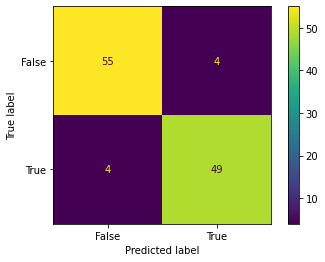

In [38]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm5, display_labels = [False, True])

cm_display.plot()
plt.show()

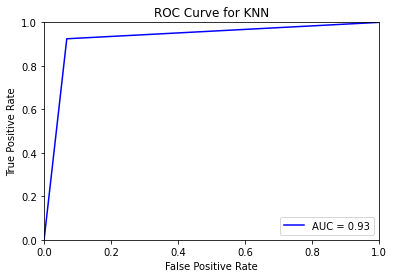

In [39]:
fpr5, tpr5, threshold = metrics.roc_curve(y_test, y_pred5)

plt.title('ROC Curve for KNN')
plt.plot(fpr5, tpr5, 'b', label = 'AUC = %0.2f' % acc5)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
knn_results = pd.DataFrame(['5','KNN',acc5,'%.6f'% precision5,recall5,f1_score5]).transpose()
knn_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
knn_results.set_index('Index',inplace=True)
data =pd.concat([data, knn_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203


<b>KNN - Hyperparameter tuning</b>

In [41]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean']}
knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5)

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 17} 



In [42]:
y_pred6=knn_grid.predict(X_test)

In [43]:
cm6=classification_report(y_test,y_pred6)
print(cm6)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        59
           1       0.84      0.81      0.83        53

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



In [44]:
cm6 = confusion_matrix(y_pred6,y_test)
TP=cm6[0,0]
TN=cm6[1,1]
FP=cm6[1,0]
FN=cm6[0,1]

acc6 = (TN+TP)/(TN+FP+TP+FN)
precision6 = TP / (TP+FP)
recall6 = TP / (TP+FN)
specificity6 = TN / (TN+FP)
f1_score6 = 2*((precision6*recall6)/(precision6+recall6))

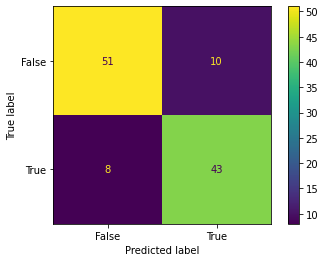

In [45]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm6, display_labels = [False, True])

cm_display.plot()
plt.show()

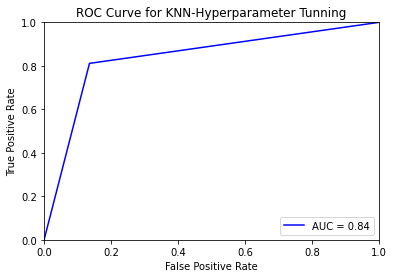

In [46]:
fpr6, tpr6, threshold = metrics.roc_curve(y_test, y_pred6)

plt.title('ROC Curve for KNN-Hyperparameter Tunning')
plt.plot(fpr6, tpr6, 'b', label = 'AUC = %0.2f' % acc6)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
knn_grid_results = pd.DataFrame(['6','KNN-Hyperparameter Tunning',acc6,'%.6f'% precision6,recall6,f1_score6]).transpose()
knn_grid_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
knn_grid_results.set_index('Index',inplace=True)
data =pd.concat([data, knn_grid_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85


<b> Random Forest </b>

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred7 = rf_model.predict(X_test)

In [49]:
cm7=classification_report(y_test,y_pred7)
print(cm7)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.96      0.91      0.93        53

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



In [50]:
cm7 = confusion_matrix(y_pred7,y_test)
TP=cm7[0,0]
TN=cm7[1,1]
FP=cm7[1,0]
FN=cm7[0,1]

acc7 = (TN+TP)/(TN+FP+TP+FN)
precision7 = TP / (TP+FP)
recall7 = TP / (TP+FN)
specificity7 = TN / (TN+FP)
f1_score7 = 2*((precision7*recall7)/(precision7+recall7))

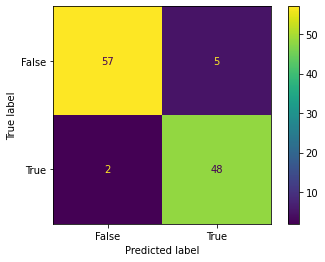

In [51]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm7, display_labels = [False, True])

cm_display.plot()
plt.show()

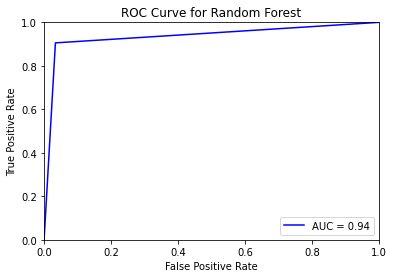

In [52]:
fpr7, tpr7, threshold = metrics.roc_curve(y_test, y_pred7)

plt.title('ROC Curve for Random Forest')
plt.plot(fpr7, tpr7, 'b', label = 'AUC = %0.2f' % acc7)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
rf_model_results = pd.DataFrame(['7','Random Forest',acc7,'%.6f'% precision7,recall7,f1_score7]).transpose()
rf_model_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
rf_model_results.set_index('Index',inplace=True)
data =pd.concat([data, rf_model_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149


<b>Random Forest - Hyperparameter Tunning</b>

In [54]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10} 



In [55]:
y_pred8=rf_grid.predict(X_test)

In [56]:
cm8=classification_report(y_test,y_pred8)
print(cm8)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        59
           1       0.92      0.91      0.91        53

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.92      0.92      0.92       112



In [57]:
cm8 = confusion_matrix(y_pred8,y_test)
TP=cm8[0,0]
TN=cm8[1,1]
FP=cm8[1,0]
FN=cm8[0,1]

acc8 = (TN+TP)/(TN+FP+TP+FN)
precision8 = TP / (TP+FP)
recall8 = TP / (TP+FN)
specificity8 = TN / (TN+FP)
f1_score8 = 2*((precision8*recall8)/(precision8+recall8))

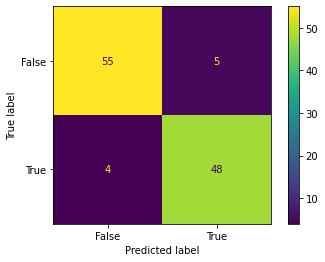

In [58]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm8, display_labels = [False, True])

cm_display.plot()
plt.show()

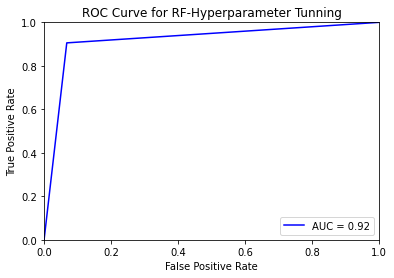

In [59]:
fpr8, tpr8, threshold = metrics.roc_curve(y_test, y_pred8)

plt.title('ROC Curve for RF-Hyperparameter Tunning')
plt.plot(fpr8, tpr8, 'b', label = 'AUC = %0.2f' % acc8)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
rf_ht_results = pd.DataFrame(['8','RF-Hyperparameter Tunning',acc8,precision8,recall8,f1_score8]).transpose()
rf_ht_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
rf_ht_results.set_index('Index',inplace=True)
data =pd.concat([data, rf_ht_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149
8,RF-Hyperparameter Tunning,0.919643,0.932203,0.916667,0.92437


<b> ADA Boost </b>

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [62]:
y_pred9=ada_model.predict(X_test)

In [63]:
cm9=classification_report(y_test,y_pred9)
print(cm9)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        59
           1       0.96      0.89      0.92        53

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112



In [64]:
cm9 = confusion_matrix(y_pred9,y_test)
TP=cm9[0,0]
TN=cm9[1,1]
FP=cm9[1,0]
FN=cm9[0,1]

acc9 = (TN+TP)/(TN+FP+TP+FN)
precision9 = TP / (TP+FP)
recall9 = TP / (TP+FN)
specificity9 = TN / (TN+FP)
f1_score9 = 2*((precision9*recall9)/(precision9+recall9))

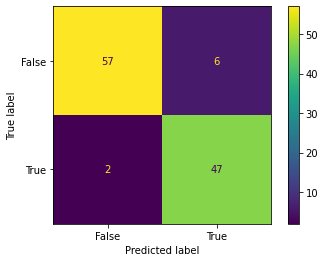

In [65]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm9, display_labels = [False, True])

cm_display.plot()
plt.show()

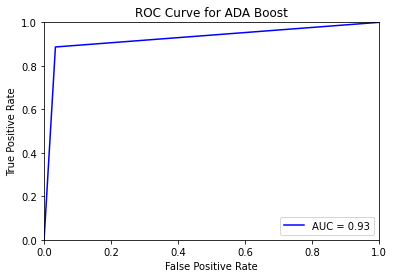

In [66]:
fpr9, tpr9, threshold = metrics.roc_curve(y_test, y_pred9)

plt.title('ROC Curve for ADA Boost')
plt.plot(fpr9, tpr9, 'b', label = 'AUC = %0.2f' % acc9)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
ada_results = pd.DataFrame(['9','ADA Boost',acc9,precision9,recall9,f1_score9]).transpose()
ada_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
ada_results.set_index('Index',inplace=True)
data =pd.concat([data, ada_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149
8,RF-Hyperparameter Tunning,0.919643,0.932203,0.916667,0.92437
9,ADA Boost,0.928571,0.966102,0.904762,0.934426


<b>ADA Boost - Hyperparameter Tunning</b>

In [68]:
tuning_parameters = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                     'n_estimators': [10,50,100,500],
                     'algorithm': ['SAMME','SAMME.R']}


adb_model = AdaBoostClassifier()

adb_grid = GridSearchCV(estimator = adb_model, param_grid = tuning_parameters, cv = 5)

# fit the model on X_train and y_train using fit()
adb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ADA Boost classifier: ', adb_grid.best_params_, '\n')

Best parameters for ADA Boost classifier:  {'algorithm': 'SAMME', 'learning_rate': 0.0001, 'n_estimators': 10} 



In [69]:
y_pred10=adb_grid.predict(X_test)

In [70]:
cm10=classification_report(y_test,y_pred10)
print(cm10)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [71]:
cm10 = confusion_matrix(y_pred10,y_test)
TP=cm10[0,0]
TN=cm10[1,1]
FP=cm10[1,0]
FN=cm10[0,1]

acc10 = (TN+TP)/(TN+FP+TP+FN)
precision10 = TP / (TP+FP)
recall10 = TP / (TP+FN)
specificity10 = TN / (TN+FP)
f1_score10 = 2*((precision10*recall10)/(precision10+recall10))

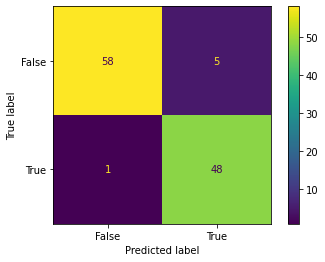

In [72]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm10, display_labels = [False, True])

cm_display.plot()
plt.show()

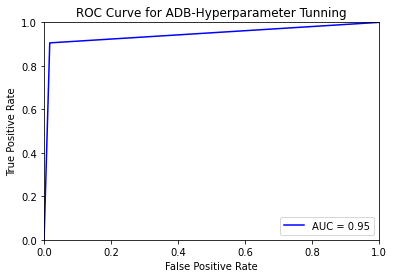

In [73]:
fpr10, tpr10, threshold = metrics.roc_curve(y_test, y_pred10)

plt.title('ROC Curve for ADB-Hyperparameter Tunning')
plt.plot(fpr10, tpr10, 'b', label = 'AUC = %0.2f' % acc10)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
adb_ht_results = pd.DataFrame(['10','ADB-Hyperparameter Tunning',acc10,precision10,recall10,f1_score10]).transpose()
adb_ht_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
adb_ht_results.set_index('Index',inplace=True)
data =pd.concat([data, adb_ht_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149
8,RF-Hyperparameter Tunning,0.919643,0.932203,0.916667,0.92437
9,ADA Boost,0.928571,0.966102,0.904762,0.934426


<b> Gradient Boosting </b>

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [76]:
y_pred11=gboost_model.predict(X_test)

In [77]:
cm11=classification_report(y_test,y_pred11)
print(cm11)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        59
           1       0.82      0.92      0.87        53

    accuracy                           0.87       112
   macro avg       0.87      0.87      0.87       112
weighted avg       0.87      0.87      0.87       112



In [78]:
cm11 = confusion_matrix(y_pred11,y_test)
TP=cm11[0,0]
TN=cm11[1,1]
FP=cm11[1,0]
FN=cm11[0,1]

acc11 = (TN+TP)/(TN+FP+TP+FN)
precision11 = TP / (TP+FP)
recall11 = TP / (TP+FN)
specificity11 = TN / (TN+FP)
f1_score11 = 2*((precision11*recall11)/(precision11+recall11))

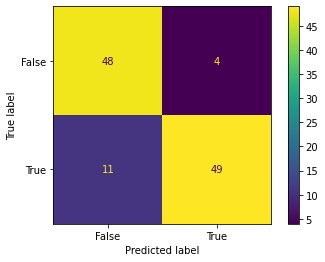

In [79]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm11, display_labels = [False, True])

cm_display.plot()
plt.show()

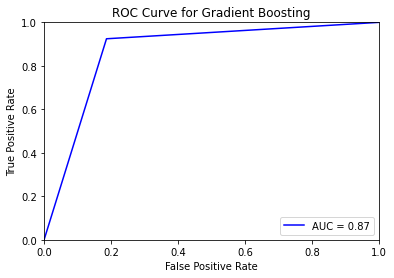

In [80]:
fpr11, tpr11, threshold = metrics.roc_curve(y_test, y_pred11)

plt.title('ROC Curve for Gradient Boosting')
plt.plot(fpr11, tpr11, 'b', label = 'AUC = %0.2f' % acc11)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
gb_results = pd.DataFrame(['11','Gradient Boosting',acc11,precision11,recall11,f1_score11]).transpose()
gb_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
gb_results.set_index('Index',inplace=True)
data =pd.concat([data, gb_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149
8,RF-Hyperparameter Tunning,0.919643,0.932203,0.916667,0.92437
9,ADA Boost,0.928571,0.966102,0.904762,0.934426


<b>Gradient Boosting - Hyperparameter Tunning</b>


In [82]:
tuning_parameters = {"n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}


gbc_model = GradientBoostingClassifier()

gbc_grid = GridSearchCV(estimator = gbc_model, param_grid = tuning_parameters, cv = 5)

# fit the model on X_train and y_train using fit()
gbc_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Gradient Boosting classifier: ', gbc_grid.best_params_, '\n')


Best parameters for Gradient Boosting classifier:  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250} 



In [83]:
y_pred12=gbc_grid.predict(X_test)

In [84]:
cm12=classification_report(y_test,y_pred12)
print(cm12)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.96      0.91      0.93        53

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



In [85]:
cm12 = confusion_matrix(y_pred12,y_test)
TP=cm12[0,0]
TN=cm12[1,1]
FP=cm12[1,0]
FN=cm12[0,1]

acc12 = (TN+TP)/(TN+FP+TP+FN)
precision12 = TP / (TP+FP)
recall12 = TP / (TP+FN)
specificity12 = TN / (TN+FP)
f1_score12 = 2*((precision12*recall12)/(precision12+recall12))

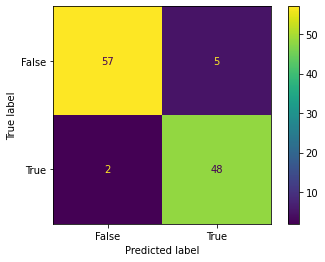

In [86]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm12, display_labels = [False, True])

cm_display.plot()
plt.show()

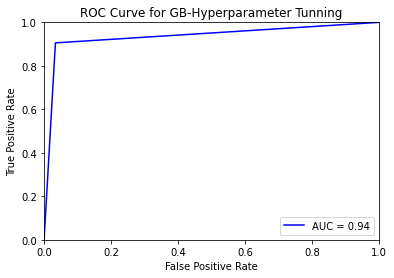

In [87]:
fpr12, tpr12, threshold = metrics.roc_curve(y_test, y_pred12)

plt.title('ROC Curve for GB-Hyperparameter Tunning')
plt.plot(fpr12, tpr12, 'b', label = 'AUC = %0.2f' % acc12)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
gb_ht_results = pd.DataFrame(['12','GB-Hyperparameter Tunning',acc12,precision12,recall12,f1_score12]).transpose()
gb_ht_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
gb_ht_results.set_index('Index',inplace=True)
data =pd.concat([data, gb_ht_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149
8,RF-Hyperparameter Tunning,0.919643,0.932203,0.916667,0.92437
9,ADA Boost,0.928571,0.966102,0.904762,0.934426


<b> XG Boost </b>

In [89]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [90]:
y_pred13=xgb_model.predict(X_test)

In [91]:
cm13=classification_report(y_test,y_pred13)
print(cm13)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        59
           1       0.88      0.92      0.90        53

    accuracy                           0.90       112
   macro avg       0.90      0.90      0.90       112
weighted avg       0.90      0.90      0.90       112



In [92]:
cm13 = confusion_matrix(y_pred13,y_test)
TP=cm13[0,0]
TN=cm13[1,1]
FP=cm13[1,0]
FN=cm13[0,1]

acc13 = (TN+TP)/(TN+FP+TP+FN)
precision13 = TP / (TP+FP)
recall13 = TP / (TP+FN)
specificity13 = TN / (TN+FP)
f1_score13 = 2*((precision13*recall13)/(precision13+recall13))

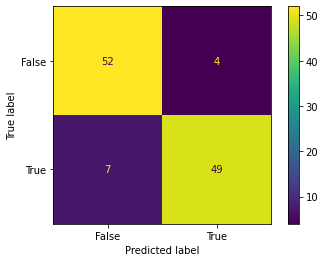

In [93]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm13, display_labels = [False, True])

cm_display.plot()
plt.show()

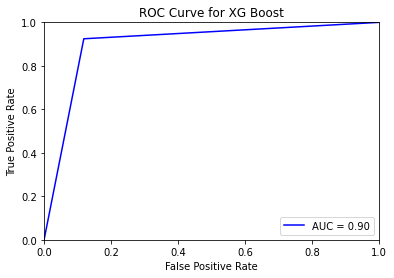

In [94]:
fpr13, tpr13, threshold = metrics.roc_curve(y_test, y_pred13)

plt.title('ROC Curve for XG Boost')
plt.plot(fpr13, tpr13, 'b', label = 'AUC = %0.2f' % acc13)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
xgb_results = pd.DataFrame(['13','XG Boost',acc13,precision13,recall13,f1_score13]).transpose()
xgb_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
xgb_results.set_index('Index',inplace=True)
data =pd.concat([data, xgb_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149
8,RF-Hyperparameter Tunning,0.919643,0.932203,0.916667,0.92437
9,ADA Boost,0.928571,0.966102,0.904762,0.934426


<b>XGB - Hyperparameter Tunning</b>


In [96]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}


xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 5)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 3} 



In [97]:
y_pred14=xgb_grid.predict(X_test)

In [98]:
cm14=classification_report(y_test,y_pred14)
print(cm14)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [99]:
cm14 = confusion_matrix(y_pred14,y_test)
TP=cm14[0,0]
TN=cm14[1,1]
FP=cm14[1,0]
FN=cm14[0,1]

acc14 = (TN+TP)/(TN+FP+TP+FN)
precision14 = TP / (TP+FP)
recall14 = TP / (TP+FN)
specificity14 = TN / (TN+FP)
f1_score14 = 2*((precision14*recall14)/(precision14+recall14))

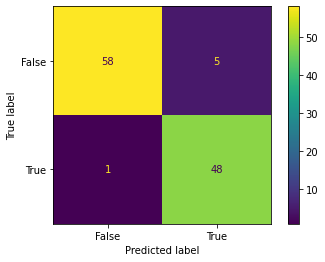

In [100]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm14, display_labels = [False, True])

cm_display.plot()
plt.show()

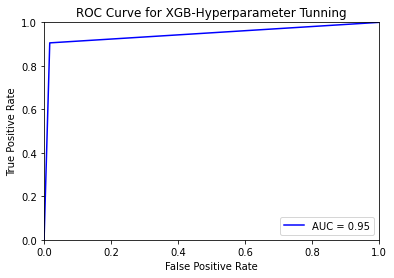

In [101]:
fpr14, tpr14, threshold = metrics.roc_curve(y_test, y_pred14)

plt.title('ROC Curve for XGB-Hyperparameter Tunning')
plt.plot(fpr14, tpr14, 'b', label = 'AUC = %0.2f' % acc14)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
xgb_ht_results = pd.DataFrame(['14','XGB-Hyperparameter Tunning',acc14,precision14,recall14,f1_score14]).transpose()
xgb_ht_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
xgb_ht_results.set_index('Index',inplace=True)
data =pd.concat([data, xgb_ht_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149
8,RF-Hyperparameter Tunning,0.919643,0.932203,0.916667,0.92437
9,ADA Boost,0.928571,0.966102,0.904762,0.934426


<b> Support Vector Machine </b>

In [103]:
from sklearn.svm import SVC # "Support vector classifier"  
svm_model = SVC(random_state=0)  
svm_model.fit(X_train, y_train) 

SVC(random_state=0)

In [104]:
y_pred15=svm_model.predict(X_test)

In [105]:
cm15=classification_report(y_test,y_pred15)
print(cm15)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [106]:
cm15 = confusion_matrix(y_pred15,y_test)
TP=cm15[0,0]
TN=cm15[1,1]
FP=cm15[1,0]
FN=cm15[0,1]

acc15 = (TN+TP)/(TN+FP+TP+FN)
precision15 = TP / (TP+FP)
recall15 = TP / (TP+FN)
specificity15 = TN / (TN+FP)
f1_score15 = 2*((precision15*recall15)/(precision15+recall15))

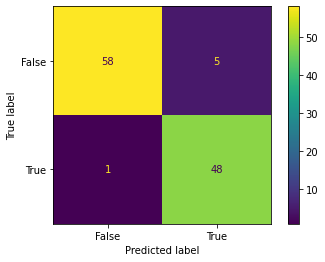

In [107]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm15, display_labels = [False, True])

cm_display.plot()
plt.show()

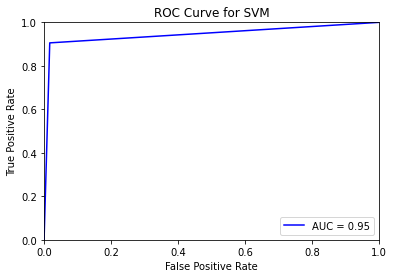

In [108]:
fpr15, tpr15, threshold = metrics.roc_curve(y_test, y_pred15)

plt.title('ROC Curve for SVM')
plt.plot(fpr15, tpr15, 'b', label = 'AUC = %0.2f' % acc15)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [109]:
svm_results = pd.DataFrame(['15','SVM',acc15,precision15,recall15,f1_score15]).transpose()
svm_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
svm_results.set_index('Index',inplace=True)
data =pd.concat([data, svm_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149
8,RF-Hyperparameter Tunning,0.919643,0.932203,0.916667,0.92437
9,ADA Boost,0.928571,0.966102,0.904762,0.934426


<b>SVM - Hyperparameter Tunning</b>

In [110]:
tuning_parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svc_model = SVC()  

svc_grid = GridSearchCV(estimator = svc_model, param_grid = tuning_parameters, cv = 5)

# fit the model on X_train and y_train using fit()
svc_grid.fit(X_train, y_train) 

# get the best parameters
print('Best parameters for SVM classifier: ', svc_grid.best_params_, '\n')

Best parameters for SVM classifier:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 



In [111]:
y_pred16=svc_grid.predict(X_test)

In [112]:
cm16=classification_report(y_test,y_pred16)
print(cm16)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [113]:
cm16 = confusion_matrix(y_pred16,y_test)
TP=cm16[0,0]
TN=cm16[1,1]
FP=cm16[1,0]
FN=cm16[0,1]

acc16 = (TN+TP)/(TN+FP+TP+FN)
precision16 = TP / (TP+FP)
recall16 = TP / (TP+FN)
specificity16 = TN / (TN+FP)
f1_score16 = 2*((precision16*recall16)/(precision16+recall16))

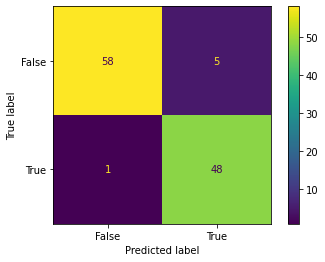

In [114]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm16, display_labels = [False, True])

cm_display.plot()
plt.show()

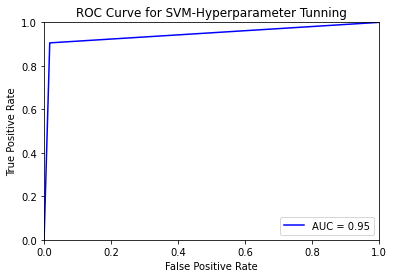

In [115]:
fpr16, tpr16, threshold = metrics.roc_curve(y_test, y_pred16)

plt.title('ROC Curve for SVM-Hyperparameter Tunning')
plt.plot(fpr16, tpr16, 'b', label = 'AUC = %0.2f' % acc16)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [116]:
svm_ht_results = pd.DataFrame(['16','SVM-Hyperparameter Tunning',acc16,precision16,recall16,f1_score16]).transpose()
svm_ht_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
svm_ht_results.set_index('Index',inplace=True)
data =pd.concat([data, svm_ht_results])
data

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Logistic Regression,0.946429,0.983051,0.920635,0.95082
2,LR-Hyperparameter Tunning,0.946429,0.983051,0.920635,0.95082
3,Naive Bayes,0.955357,0.983051,0.935484,0.958678
4,NB-Hyperparameter Tuning,0.946429,0.983051,0.920635,0.95082
5,KNN,0.928571,0.932203,0.932203,0.932203
6,KNN-Hyperparameter Tunning,0.839286,0.864407,0.836066,0.85
7,Random Forest,0.9375,0.966102,0.919355,0.942149
8,RF-Hyperparameter Tunning,0.919643,0.932203,0.916667,0.92437
9,ADA Boost,0.928571,0.966102,0.904762,0.934426


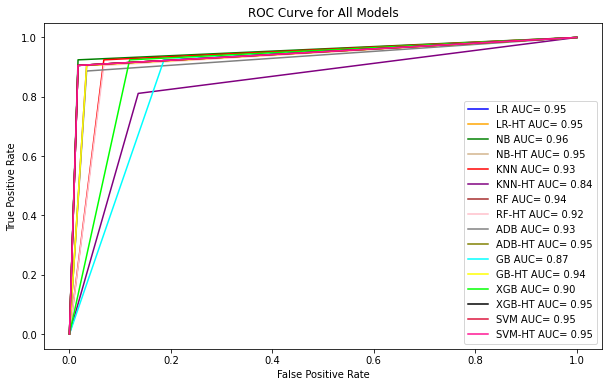

In [117]:
plt.figure(figsize=(10,6)).clf()
plt.plot(fpr1,tpr1,label='LR AUC= %0.2f' %acc1, color="blue")
plt.plot(fpr2,tpr2,label='LR-HT AUC= %0.2f' %acc2, color="orange")
plt.plot(fpr3,tpr3,label='NB AUC= %0.2f' %acc3, color="green")
plt.plot(fpr4,tpr4,label='NB-HT AUC= %0.2f' %acc4, color="tan")
plt.plot(fpr5,tpr5,label='KNN AUC= %0.2f' %acc5, color="red")
plt.plot(fpr6,tpr6,label='KNN-HT AUC= %0.2f' %acc6, color="purple")
plt.plot(fpr7,tpr7,label='RF AUC= %0.2f' %acc7, color="brown")
plt.plot(fpr8,tpr8,label='RF-HT AUC= %0.2f' %acc8, color="pink")
plt.plot(fpr9,tpr9,label='ADB AUC= %0.2f' %acc9, color="gray")
plt.plot(fpr10,tpr10,label='ADB-HT AUC= %0.2f' %acc10, color="olive")
plt.plot(fpr11,tpr11,label='GB AUC= %0.2f' %acc11, color="cyan")
plt.plot(fpr12,tpr12,label='GB-HT AUC= %0.2f' %acc12, color="yellow")
plt.plot(fpr13,tpr13,label='XGB AUC= %0.2f' %acc13, color="lime")
plt.plot(fpr14,tpr14,label='XGB-HT AUC= %0.2f' %acc14, color="black")
plt.plot(fpr15,tpr15,label='SVM AUC= %0.2f' %acc15, color="crimson")
plt.plot(fpr16,tpr16,label='SVM-HT AUC= %0.2f' %acc16, color="deeppink")
plt.title('ROC Curve for All Models')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc ="lower right")

<b>Stack Model 1 (best model)</b>

In [205]:
from sklearn.ensemble import StackingClassifier
base_learners = [('rf_model',rf_model),
                 ('NB_model', GaussianNB())
                 ]
stack_model = StackingClassifier(estimators = base_learners, final_estimator=LogisticRegression())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model', RandomForestClassifier()),
                               ('NB_model', GaussianNB())],
                   final_estimator=LogisticRegression())

In [206]:
y_pred17=stack_model.predict(X_test)

In [207]:
cm17=classification_report(y_test,y_pred17)
print(cm17)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.98      0.92      0.95        53

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112



In [208]:
cm17 = confusion_matrix(y_pred17,y_test)
TP=cm17[0,0]
TN=cm17[1,1]
FP=cm17[1,0]
FN=cm17[0,1]

acc17 = (TN+TP)/(TN+FP+TP+FN)
precision17 = TP / (TP+FP)
recall17 = TP / (TP+FN)
specificity17 = TN / (TN+FP)
f1_score17 = 2*((precision17*recall17)/(precision17+recall17))
print(acc17)
print(precision17)

0.9553571428571429
0.9830508474576272


In [209]:
stack_1_results = pd.DataFrame(['1','Stack Model 1',acc17,precision17,recall17,f1_score17]).transpose()
stack_1_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
stack_1_results.set_index('Index',inplace=True)
data1=stack_1_results
data1

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Stack Model 1,0.955357,0.983051,0.935484,0.958678


<b>Stack Model 2 (94%)</b>

In [181]:
base_learners = [('gnb_grid',gnb_grid),
                 ('adb_grid',adb_grid),
                 ('NB_model', gnb_model),
                 ('xgb_grid',xgb_grid),
                 ('svc_model',svc_model),
                 ('svc_grid',svc_grid)
                 ]
stack_model1 = StackingClassifier(estimators = base_learners, final_estimator=LogisticRegression())

# fit the model on train dataset
stack_model1.fit(X_train, y_train)

StackingClassifier(estimators=[('gnb_grid',
                                GridSearchCV(cv=5, estimator=GaussianNB(),
                                             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.3287...
                                                                     random_state=None,
                                                                     reg_alpha=None,
                                                                     reg_lambda=None, ...),
                                             param_grid={'gamma': [0, 1, 2, 3,
                                                                   4],
                                                         'learning_rate': [0.1,
                                                                           0.2,
                                                                           0.3,
                                                                           0.4,
                                                                           0.5,
                                                                           0.6],
                                                         'max_depth': range(3, 10)})),
                               ('svc_model', SVC()),
                               ('svc_grid',
                                GridSearchCV(cv=5, estimator=SVC(),
                                             param_grid={'C': [0.1, 1, 10, 100],
                                                         'gamma': [1, 0.1, 0.01,
                                                                   0.001],
                                                         'kernel': ['rbf',
                                                                    'poly',
                                                                    'sigmoid']}))],
                   final_estimator=LogisticRegression())

In [210]:
y_pred18=stack_model1.predict(X_test)

In [211]:
cm18=classification_report(y_test,y_pred18)
print(cm18)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [212]:
cm18 = confusion_matrix(y_pred18,y_test)
TP=cm18[0,0]
TN=cm18[1,1]
FP=cm18[1,0]
FN=cm18[0,1]

acc18= (TN+TP)/(TN+FP+TP+FN)
precision18 = TP / (TP+FP)
recall18 = TP / (TP+FN)
specificity18 = TN / (TN+FP)
f1_score18 = 2*((precision18*recall18)/(precision18+recall18))
print(acc18)
print(precision18)

0.9464285714285714
0.9830508474576272


In [213]:
stack_2_results = pd.DataFrame(['2','Stack Model 2',acc18,precision18,recall18,f1_score18]).transpose()
stack_2_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
stack_2_results.set_index('Index',inplace=True)
data1 =pd.concat([data1, stack_2_results])
data1

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Stack Model 1,0.955357,0.983051,0.935484,0.958678
2,Stack Model 2,0.946429,0.983051,0.920635,0.95082


<b>Stack Model 3 (weak models)</b>

In [185]:
base_learners = [('knn_model',knn_model),
                 ('knn_grid',knn_grid),
                 ('rf_model', rf_model),
                 ('rf_grid',rf_grid),
                 ('adb_model',adb_model),
                 ('gbc_model',gbc_model),
                 ('gbc_grid',gbc_grid),
                 ('xgb_model',xgb_model)
                 ]
stack_model2 = StackingClassifier(estimators = base_learners, final_estimator=LogisticRegression())

# fit the model on train dataset
stack_model2.fit(X_train, y_train)

StackingClassifier(estimators=[('knn_model',
                                KNeighborsClassifier(n_neighbors=3)),
                               ('knn_grid',
                                GridSearchCV(cv=5,
                                             estimator=KNeighborsClassifier(),
                                             param_grid={'metric': ['euclidean'],
                                                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])})),
                               ('rf_model', RandomForestClassifier()),
                               ('rf_grid',
                                GridSearchCV(cv=5,
                                             estimator=RandomForestClassifier(random_state=1...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None,
                                              reg_alpha=None, reg_lambda=None, ...))],
                   final_estimator=LogisticRegression())

In [214]:
y_pred19=stack_model2.predict(X_test)

In [215]:
cm19=classification_report(y_test,y_pred19)
print(cm19)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        59
           1       0.94      0.91      0.92        53

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112



In [216]:
cm19 = confusion_matrix(y_pred19,y_test)
TP=cm19[0,0]
TN=cm19[1,1]
FP=cm19[1,0]
FN=cm19[0,1]

acc19= (TN+TP)/(TN+FP+TP+FN)
precision19 = TP / (TP+FP)
recall19 = TP / (TP+FN)
specificity19 = TN / (TN+FP)
f1_score19 = 2*((precision19*recall19)/(precision19+recall19))
print(acc19)
print(precision19)

0.9285714285714286
0.9491525423728814


In [217]:
stack_3_results = pd.DataFrame(['3','Stack Model 3',acc19,precision19,recall19,f1_score19]).transpose()
stack_3_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
stack_3_results.set_index('Index',inplace=True)
data1 =pd.concat([data1, stack_3_results])
data1

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Stack Model 1,0.955357,0.983051,0.935484,0.958678
2,Stack Model 2,0.946429,0.983051,0.920635,0.95082
3,Stack Model 3,0.928571,0.949153,0.918033,0.933333


<b>Stack Model 4</b>

In [218]:
from sklearn.ensemble import StackingClassifier
base_learners = [('svc_model',SVC()),
                 ('adb_model', AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.0001, n_estimators= 10)),
                 ('NB_model', GaussianNB()),
                 ('xgb_model',xgb_grid)
                 ]
stack_model3 = StackingClassifier(estimators = base_learners, final_estimator=LogisticRegression())

# fit the model on train dataset
stack_model3.fit(X_train, y_train)

StackingClassifier(estimators=[('svc_model', SVC()),
                               ('adb_model',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   learning_rate=0.0001,
                                                   n_estimators=10)),
                               ('NB_model', GaussianNB()),
                               ('xgb_model',
                                GridSearchCV(cv=5,
                                             estimator=XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bynode=None,
                                                                     colsample_bytree=None,
                                                                     early_stopping_rou...
                                                                     max_depth=None,
                                                                     max_leaves=None,
                                                                     min_child_weight=None,
                                                                     missing=nan,
                                                                     monotone_constraints=None,
                                                                     n_estimators=100,
                                                                     n_jobs=None,
                                                                     num_parallel_tree=None,
                                                                     predictor=None,
                                                                     random_state=None,
                                                                     reg_alpha=None,
                                                                     reg_lambda=None, ...),
                                             param_grid={'gamma': [0, 1, 2, 3,
                                                                   4],
                                                         'learning_rate': [0.1,
                                                                           0.2,
                                                                           0.3,
                                                                           0.4,
                                                                           0.5,
                                                                           0.6],
                                                         'max_depth': range(3, 10)}))],
                   final_estimator=LogisticRegression())

In [220]:
y_pred20=stack_model3.predict(X_test)

In [221]:
cm20=classification_report(y_test,y_pred20)
print(cm20)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [222]:
cm20 = confusion_matrix(y_pred20,y_test)
TP=cm20[0,0]
TN=cm20[1,1]
FP=cm20[1,0]
FN=cm20[0,1]

acc20= (TN+TP)/(TN+FP+TP+FN)
precision20 = TP / (TP+FP)
recall20 = TP / (TP+FN)
specificity20 = TN / (TN+FP)
f1_score20 = 2*((precision20*recall20)/(precision20+recall20))
print(acc20)
print(precision20)

0.9464285714285714
0.9830508474576272


In [223]:
stack_4_results = pd.DataFrame(['4','Stack Model 4',acc20,precision20,recall20,f1_score20]).transpose()
stack_4_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
stack_4_results.set_index('Index',inplace=True)
data1 =pd.concat([data1, stack_4_results])
data1

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Stack Model 1,0.955357,0.983051,0.935484,0.958678
2,Stack Model 2,0.946429,0.983051,0.920635,0.95082
3,Stack Model 3,0.928571,0.949153,0.918033,0.933333
4,Stack Model 4,0.946429,0.983051,0.920635,0.95082


<b>Stack Model 5 (All models)</b>

In [224]:
base_learners = [('lr_grid',lr_grid),
                 ('gnb_grid',gnb_grid),
                 ('gnb_model', gnb_model),
                 ('knn_model',knn_model),
                 ('knn_grid',knn_grid),
                 ('rf_model', rf_model),
                 ('rf_grid',rf_grid),
                 ('adb_model',adb_model),
                 ('adb_grid',adb_grid),
                 ('gbc_model',gbc_model),
                 ('gbc_grid',gbc_grid),
                 ('xgb_model',xgb_model),
                 ('xgb_grid',xgb_grid),
                 ('svc_grid',svc_grid),
                 ('svc_model',svc_model)
                 ]
stack_model4 = StackingClassifier(estimators = base_learners, final_estimator=LogisticRegression())

# fit the model on train dataset
stack_model4.fit(X_train, y_train)

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was

StackingClassifier(estimators=[('lr_grid',
                                GridSearchCV(cv=5,
                                             estimator=LogisticRegression(),
                                             param_grid={'C': [100, 10, 1.0,
                                                               0.1, 0.01],
                                                         'max_iter': [100, 1000,
                                                                      2500,
                                                                      5000],
                                                         'penalty': ['l1', 'l2',
                                                                     'elasticnet',
                                                                     'none'],
                                                         'solver': ['lbfgs',
                                                                    'newton-cg',
                                                                    'liblinear',
                                                                    'sag',
                                                                    'saga']})),
                               ('gnb_grid',
                                GridSearchCV(cv=5, estimator=GaussianNB(),
                                             param_grid={'var_smoothing': array([...
                                                                     random_state=None,
                                                                     reg_alpha=None,
                                                                     reg_lambda=None, ...),
                                             param_grid={'gamma': [0, 1, 2, 3,
                                                                   4],
                                                         'learning_rate': [0.1,
                                                                           0.2,
                                                                           0.3,
                                                                           0.4,
                                                                           0.5,
                                                                           0.6],
                                                         'max_depth': range(3, 10)})),
                               ('svc_grid',
                                GridSearchCV(cv=5, estimator=SVC(),
                                             param_grid={'C': [0.1, 1, 10, 100],
                                                         'gamma': [1, 0.1, 0.01,
                                                                   0.001],
                                                         'kernel': ['rbf',
                                                                    'poly',
                                                                    'sigmoid']})),
                               ('svc_model', SVC())],
                   final_estimator=LogisticRegression())

In [225]:
y_pred21=stack_model4.predict(X_test)

In [226]:
cm21=classification_report(y_test,y_pred21)
print(cm21)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.98      0.91      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [227]:
cm21 = confusion_matrix(y_pred21,y_test)
TP=cm21[0,0]
TN=cm21[1,1]
FP=cm21[1,0]
FN=cm21[0,1]

acc21= (TN+TP)/(TN+FP+TP+FN)
precision21 = TP / (TP+FP)
recall21 = TP / (TP+FN)
specificity21 = TN / (TN+FP)
f1_score21 = 2*((precision21*recall21)/(precision21+recall21))
print(acc21)
print(precision21)

0.9464285714285714
0.9830508474576272


In [228]:
stack_5_results = pd.DataFrame(['5','Stack Model 5',acc21,precision21,recall21,f1_score21]).transpose()
stack_5_results.columns = ['Index','Model Name','Accuracy','Precision','Recall','F1-Score']
stack_5_results.set_index('Index',inplace=True)
data1 =pd.concat([data1, stack_5_results])
data1

,Model Name,Accuracy,Precision,Recall,F1-Score
Index,,,,,
1,Stack Model 1,0.955357,0.983051,0.935484,0.958678
2,Stack Model 2,0.946429,0.983051,0.920635,0.95082
3,Stack Model 3,0.928571,0.949153,0.918033,0.933333
4,Stack Model 4,0.946429,0.983051,0.920635,0.95082
5,Stack Model 5,0.946429,0.983051,0.920635,0.95082
